<a href="https://colab.research.google.com/github/sindhuravuri666/GroundWater-ML/blob/main/final_groundwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# After uploading, you can read the file using Pandas
import pandas as pd

# Load the dataset (replace 'filename.csv' with your actual file name)
data = pd.read_csv('DWLR_Dataset.csv')

# Display the first few rows of the dataset
data.head()


Saving DWLR_Dataset.csv to DWLR_Dataset.csv


,Date,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
0,2023-01-01,2.124836,-0.601831,26.958453,6.948386,8.282231
1,2023-01-02,2.099955,0.396578,15.306932,6.952946,7.998230
2,2023-01-03,2.146121,0.139768,29.263846,6.912783,8.173989
3,2023-01-04,2.196756,0.327833,8.246142,6.972447,8.079537
4,2023-01-05,2.115765,-0.917756,35.654194,6.962424,8.425726


Data Exploration

In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check the column names
print("Column names:")
print(data.columns)

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Get basic statistics
print("Basic statistics of the dataset:")
print(data.describe())


Dataset shape: (365, 6)
Column names:
Index(['Date', 'Water_Level_m', 'Temperature_C', 'Rainfall_mm', 'pH',
       'Dissolved_Oxygen_mg_L'],
      dtype='object')
Missing values in each column:
Date                      0
Water_Level_m             0
Temperature_C             0
Rainfall_mm               0
pH                        0
Dissolved_Oxygen_mg_L    20
dtype: int64
Basic statistics of the dataset:
       Water_Level_m  Temperature_C  Rainfall_mm          pH  \
count     365.000000     365.000000   365.000000  365.000000   
mean        3.432689      13.772649   105.195185    7.259963   
std         0.773076       8.105750    81.624762    0.604575   
min         2.093622      -2.158371     7.497851    6.900317   
25%         2.722986       6.491563    39.821698    7.053846   
50%         3.737387      14.636813    78.451984    7.154121   
75%         4.114597      21.016989   136.680474    7.283242   
max         4.656033      27.993951   315.102779   11.418093   

       Dissolve

In [ ]:
# Handling Missing Values (using interpolation)
data['Dissolved_Oxygen_mg_L'].interpolate(method='linear', inplace=True)

# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Checking the changes
print("Missing values after interpolation:")
print(data.isnull().sum())
print("Updated data types:")
print(data.dtypes)

# Creating additional features
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Season'] = data['Date'].dt.month % 12 // 3 + 1  # Assigning seasons based on month


Missing values after interpolation:
Date                     0
Water_Level_m            0
Temperature_C            0
Rainfall_mm              0
pH                       0
Dissolved_Oxygen_mg_L    0
dtype: int64
Updated data types:
Date                     datetime64[ns]
Water_Level_m                   float64
Temperature_C                   float64
Rainfall_mm                     float64
pH                              float64
Dissolved_Oxygen_mg_L           float64
dtype: object


<ipython-input-4-d7e62ed5a4bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dissolved_Oxygen_mg_L'].interpolate(method='linear', inplace=True)


In [ ]:
# Creating additional features
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Assigning seasons based on month
data['Season'] = (data['Date'].dt.month % 12 // 3 + 1)

# Display the updated DataFrame to see the new features
print(data[['Date', 'Month', 'Day', 'Season']].head())


        Date  Month  Day  Season
0 2023-01-01      1    1       1
1 2023-01-02      1    2       1
2 2023-01-03      1    3       1
3 2023-01-04      1    4       1
4 2023-01-05      1    5       1


Data Visualization

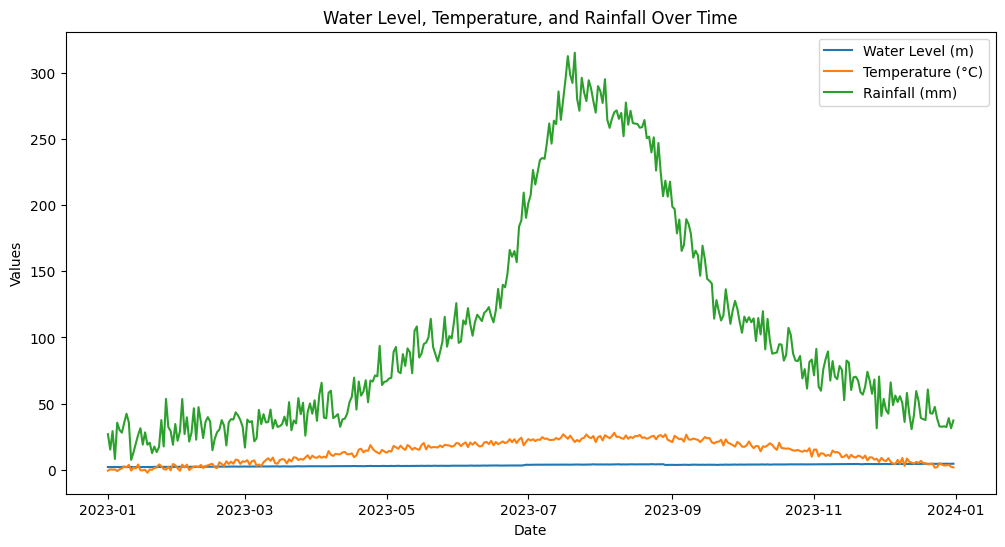

In [ ]:
#line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Water_Level_m'], label='Water Level (m)')
plt.plot(data['Date'], data['Temperature_C'], label='Temperature (°C)')
plt.plot(data['Date'], data['Rainfall_mm'], label='Rainfall (mm)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Water Level, Temperature, and Rainfall Over Time')
plt.legend()
plt.show()


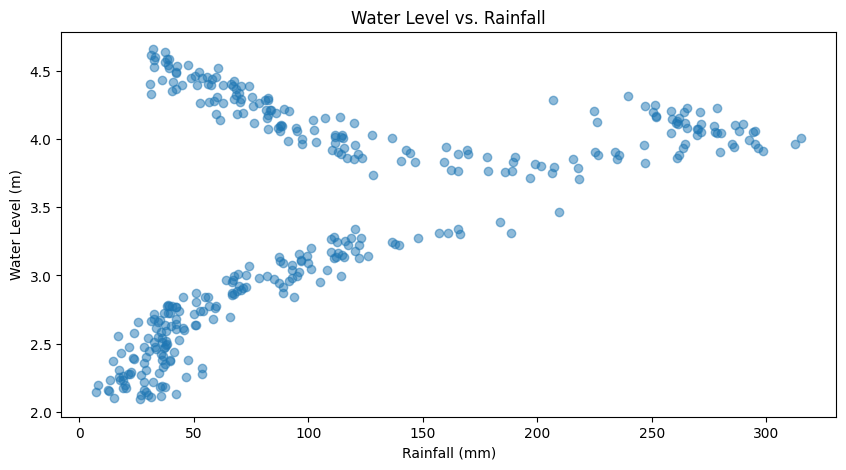

In [ ]:
#scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(data['Rainfall_mm'], data['Water_Level_m'], alpha=0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Water Level (m)')
plt.title('Water Level vs. Rainfall')
plt.show()


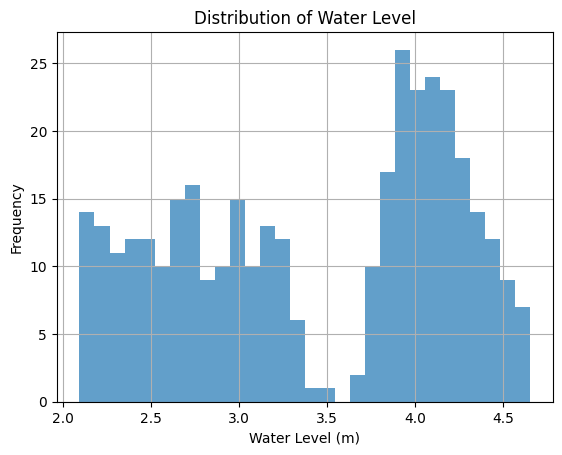

In [ ]:
#
data['Water_Level_m'].hist(bins=30, alpha=0.7)
plt.xlabel('Water Level (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Water Level')
plt.show()


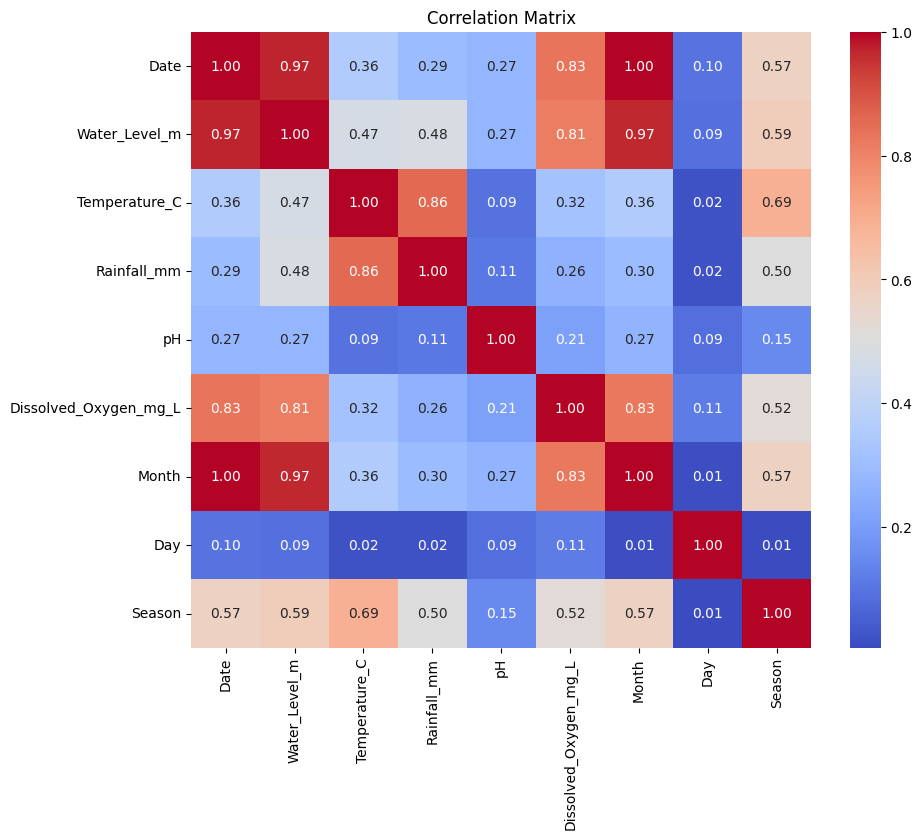

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


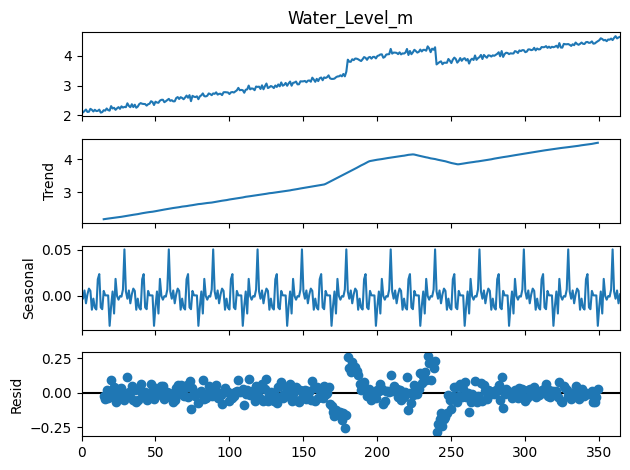

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Water_Level_m'], model='additive', period=30)  # Adjust the period as necessary
result.plot()
plt.show()


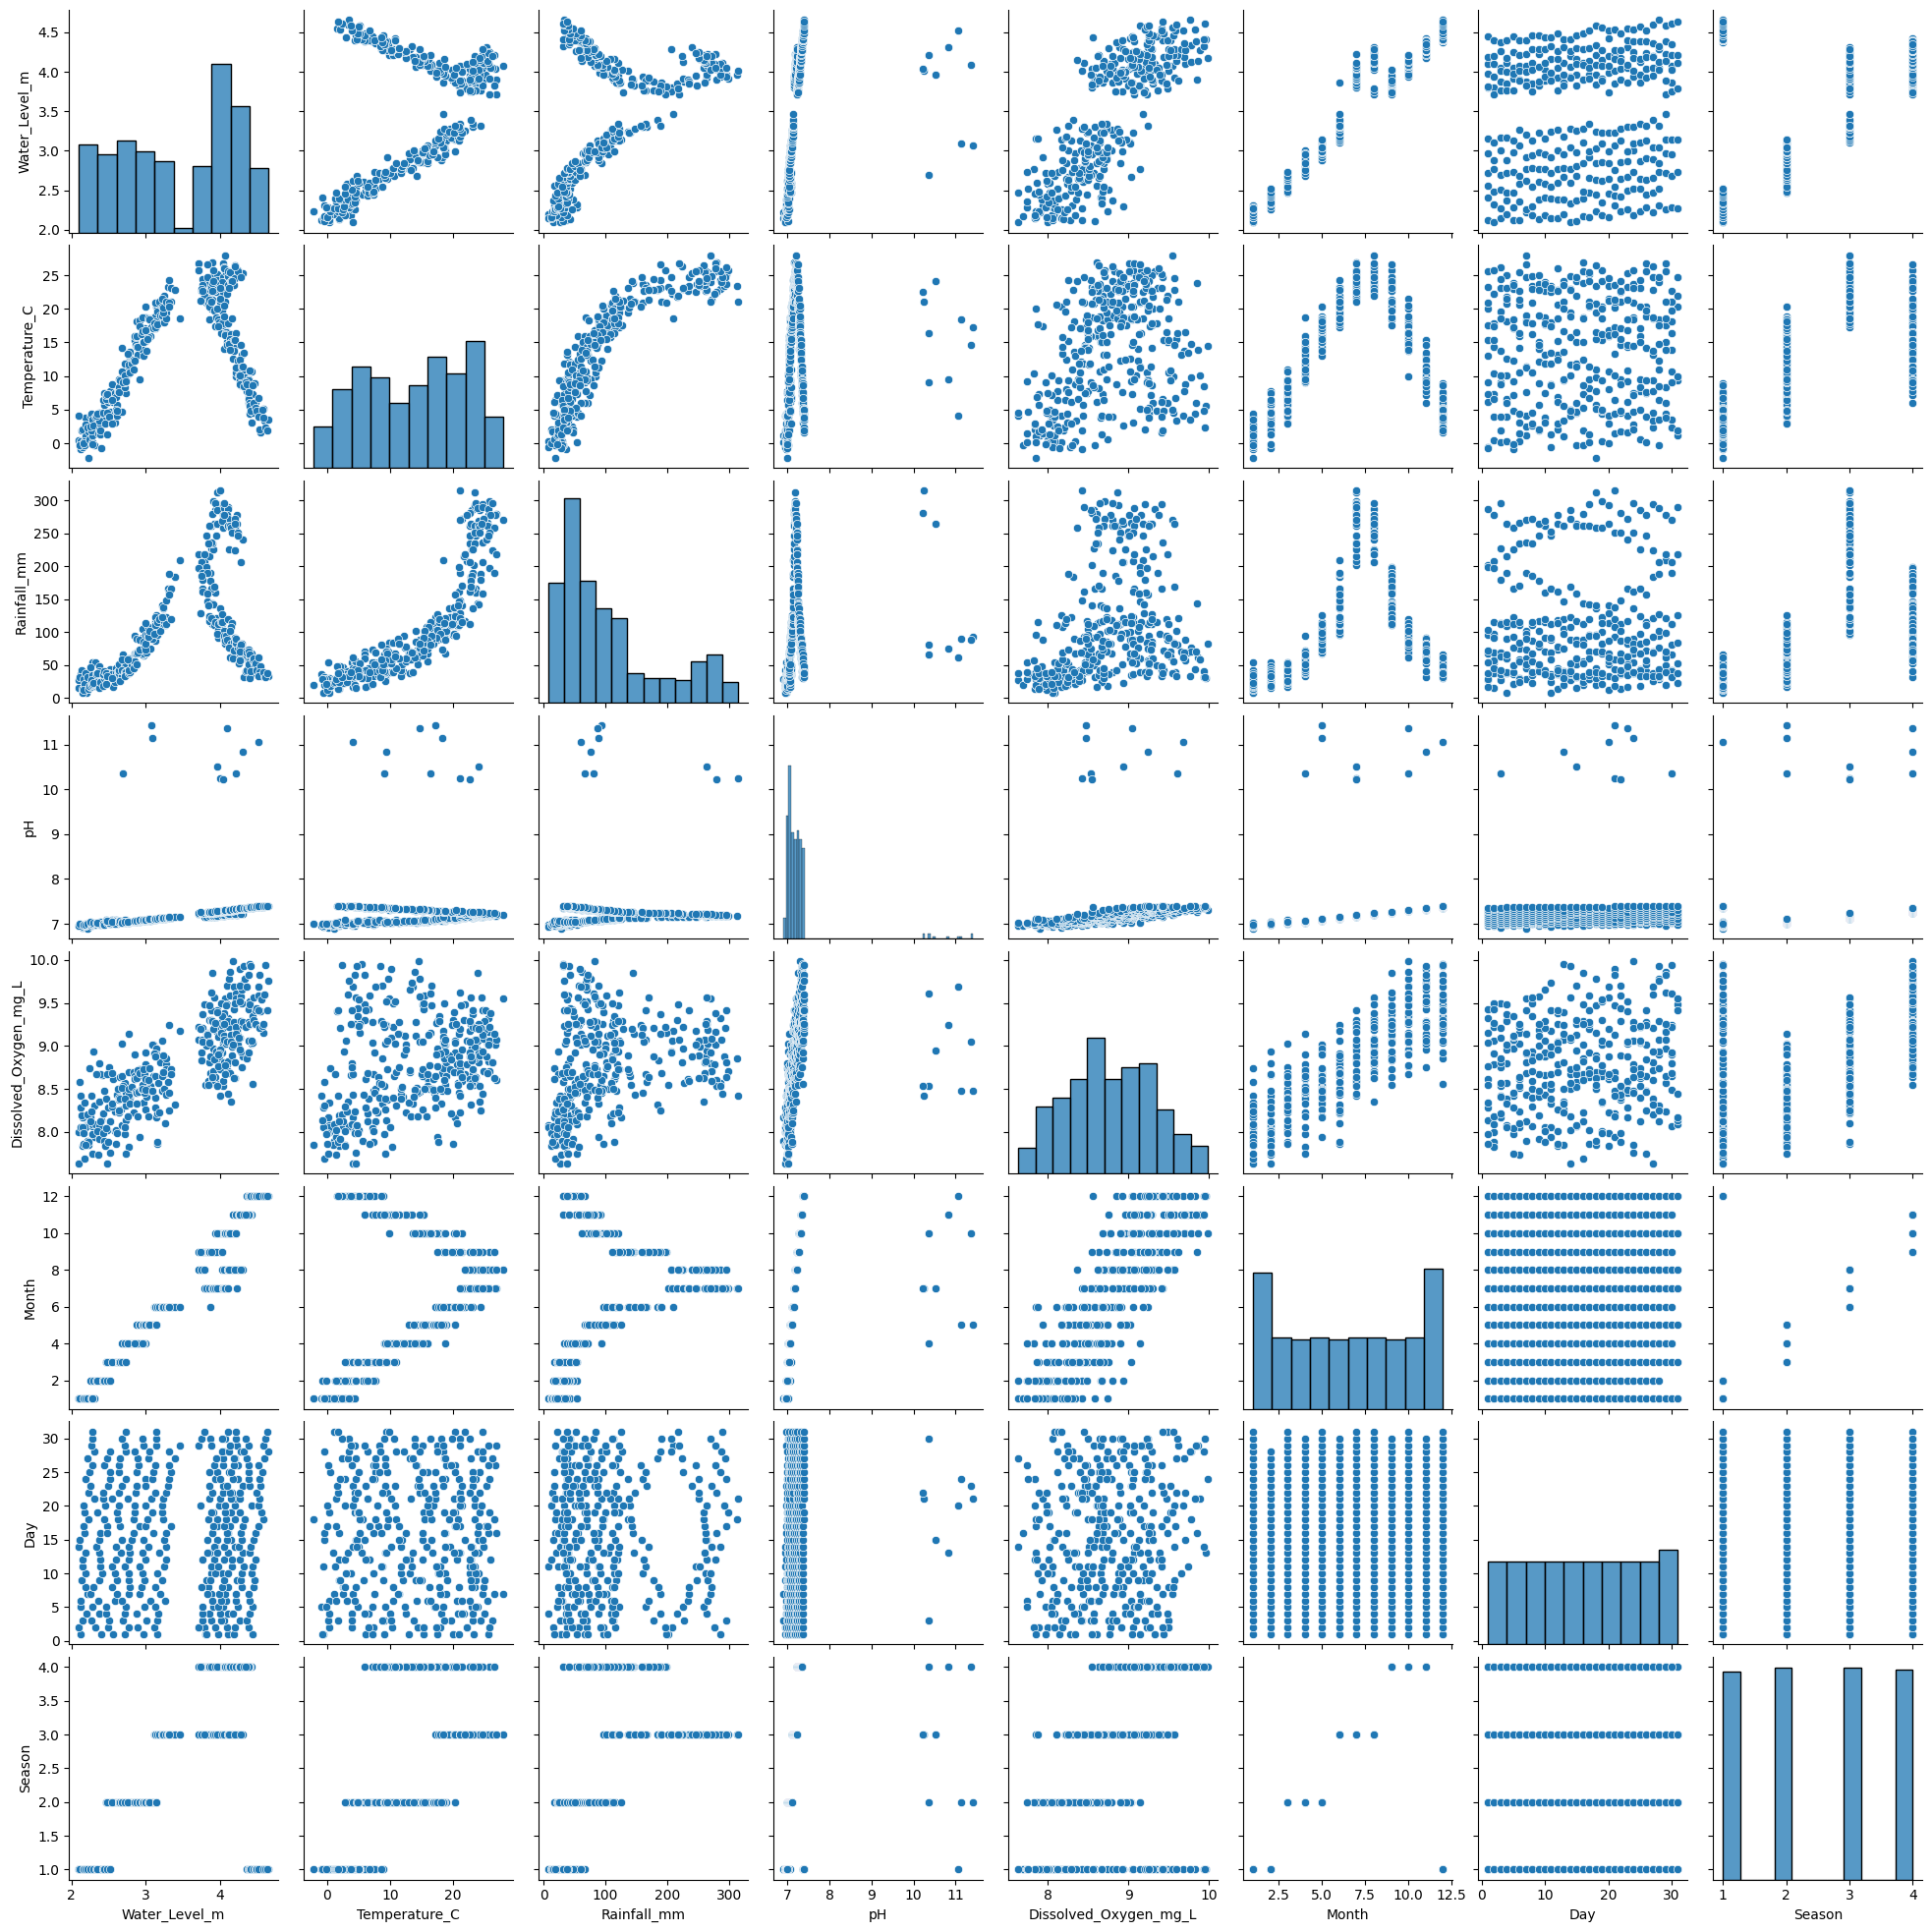

In [ ]:
sns.pairplot(data)
plt.show()


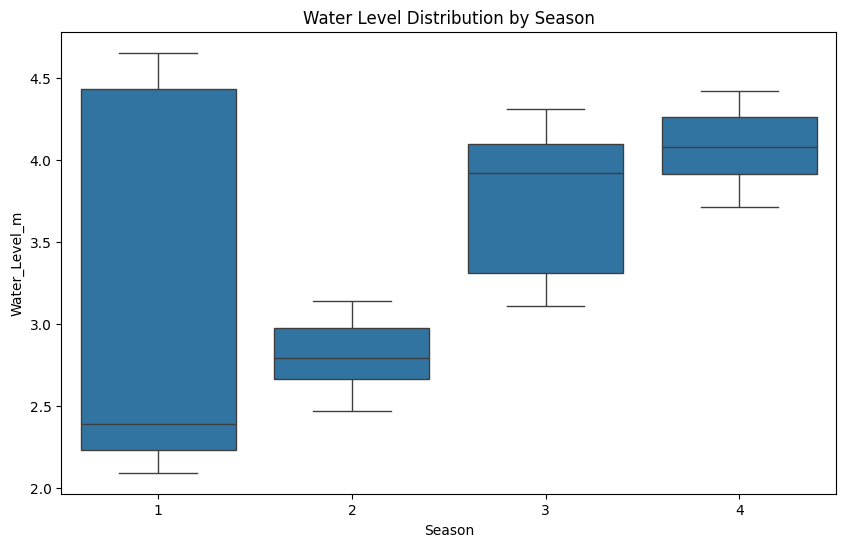

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Water_Level_m', data=data)
plt.title('Water Level Distribution by Season')
plt.show()


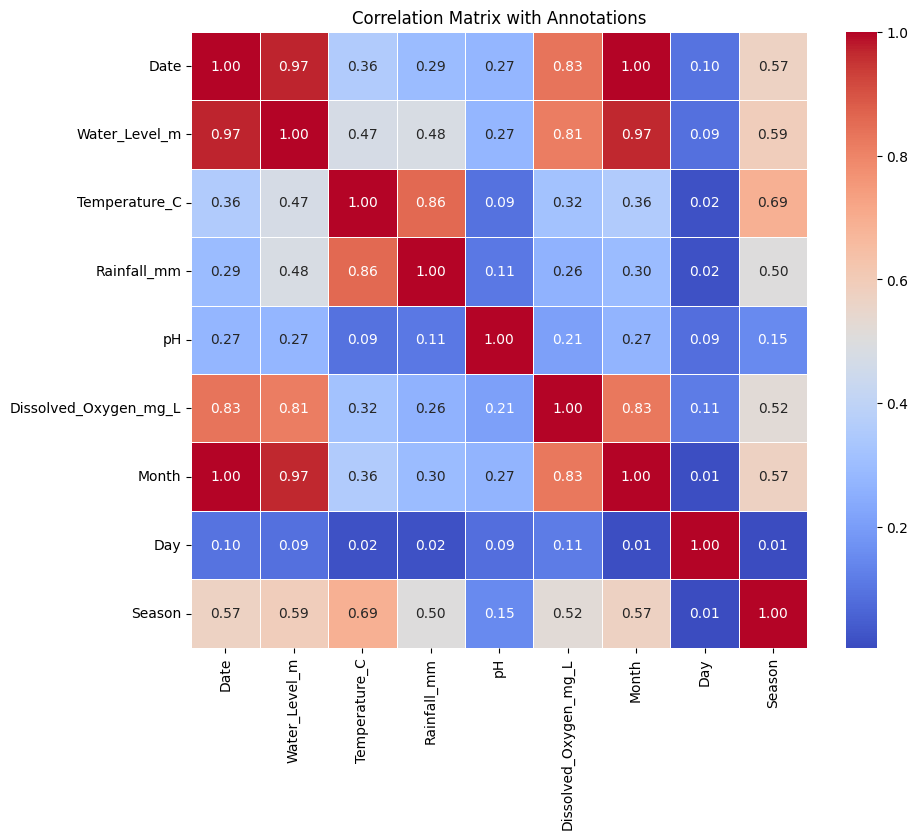

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix with Annotations')
plt.show()


In [ ]:
# Drop the 'pH' column from the dataset
data_without_ph = data.drop(columns=['pH'])
# Drop the 'Day' column from the dataset
data_final = data.drop(columns=['Day'])
# Drop the 'Date' column from dataset
data_final = data_final.drop(columns=['Date'])


In [ ]:
# Assuming 'data_final' is your current DataFrame
selected_columns = ['Water_Level_m', 'Temperature_C', 'Rainfall_mm', 'Dissolved_Oxygen_mg_L']

# Create a new DataFrame with only the selected columns
data_selected = data_final[selected_columns]

# Display the new DataFrame
print(data_selected.head())  # Check the first few rows of the new DataFrame


   Water_Level_m  Temperature_C  Rainfall_mm  Dissolved_Oxygen_mg_L
0       2.124836      -0.601831    26.958453               8.282231
1       2.099955       0.396578    15.306932               7.998230
2       2.146121       0.139768    29.263846               8.173989
3       2.196756       0.327833     8.246142               8.079537
4       2.115765      -0.917756    35.654194               8.425726


In [ ]:
print(data_selected.describe)

<bound method NDFrame.describe of      Water_Level_m  Temperature_C  Rainfall_mm  Dissolved_Oxygen_mg_L
0         2.124836      -0.601831    26.958453               8.282231
1         2.099955       0.396578    15.306932               7.998230
2         2.146121       0.139768    29.263846               8.173989
3         2.196756       0.327833     8.246142               8.079537
4         2.115765      -0.917756    35.654194               8.425726
..             ...            ...          ...                    ...
360       4.598495       3.328421    32.910361               9.593726
361       4.656033       3.480948    32.347558               9.761713
362       4.580826       3.823570    39.089482               9.250805
363       4.613217       2.341459    31.426052               9.943686
364       4.634507       1.832543    37.326401               9.418663

[365 rows x 4 columns]>


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select the features for scaling (exclude target variable)
features = data_selected.drop(columns=['Water_Level_m'])
target = data_selected['Water_Level_m']

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for easier use
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Water_Level_m'] = target  # Add the target back


Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = scaled_data.drop(columns=['Water_Level_m'])
y = scaled_data['Water_Level_m']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Training randam forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.05858916004791193
R² Score: 0.9144782590041043


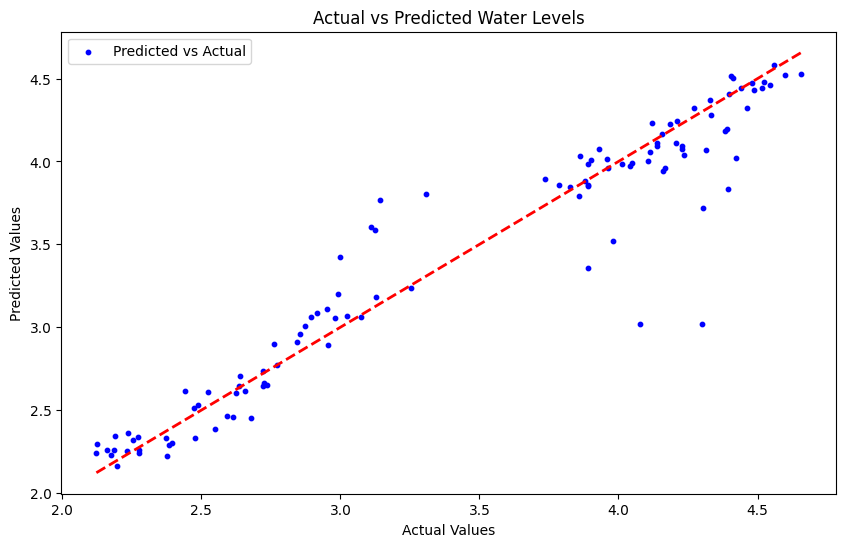

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=10, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Water Levels')
plt.legend()
plt.show()


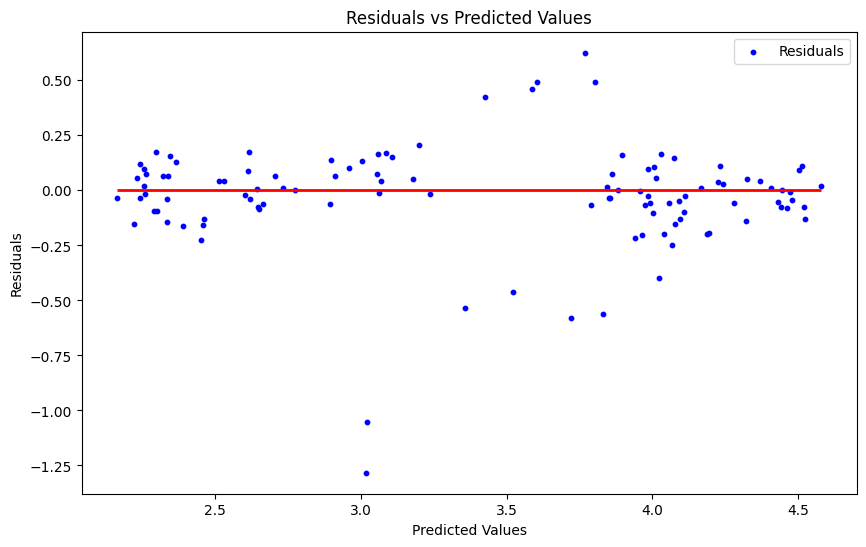

In [ ]:
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
# Define an acceptable error range (for example, 10% of actual values)
error_range = 0.1  # 10%

# Calculate the absolute percentage errors
absolute_errors = abs(y_pred - y_test)

# Calculate accuracy based on the acceptable error range
accuracy = (absolute_errors <= (error_range * y_test)).mean() * 100

print(f"Accuracy (within {error_range * 100:.0f}% of actual values): {accuracy:.2f}%")


Accuracy (within 10% of actual values): 90.00%


In [ ]:

# Assuming your model is trained
feature_importances = model.feature_importances_
feature_names = features.columns  # Replace with your feature DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                 Feature  Importance
2  Dissolved_Oxygen_mg_L    0.628954
1            Rainfall_mm    0.234631
0          Temperature_C    0.136415


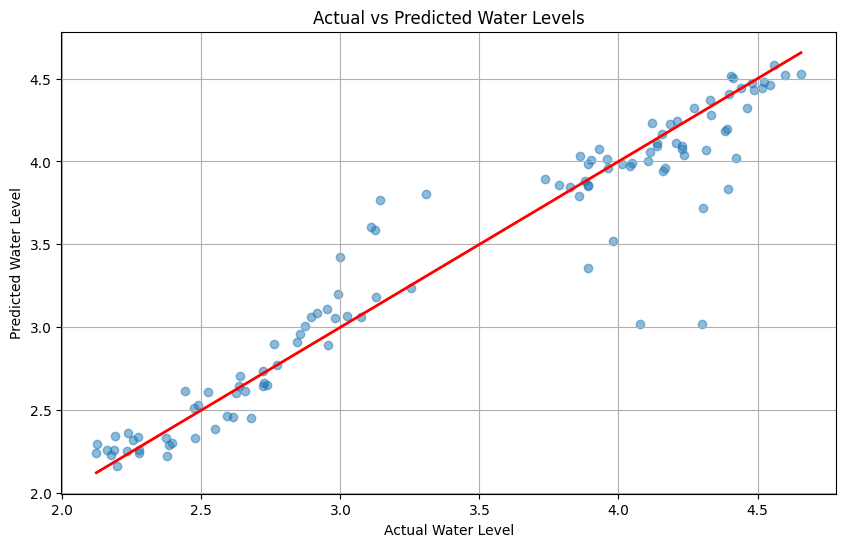

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Water Level')
plt.ylabel('Predicted Water Level')
plt.title('Actual vs Predicted Water Levels')
plt.grid()
plt.show()


Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)


In [ ]:
# Calculate Mean Squared Error and R-squared
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")


Linear Regression Mean Squared Error: 0.05858916004791193
Linear Regression R-squared: 0.9144782590041043


In [ ]:


# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred, tolerance=0.1):
    # Calculate the number of predictions within the specified tolerance
    accuracy_count = np.sum(np.abs(y_true - y_pred) <= tolerance * y_true)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

# Calculate accuracy for Linear Regression model
accuracy_linear = calculate_accuracy(y_test, y_pred_linear)

# Display the results
print(f"Linear Regression Accuracy (within 10%): {accuracy_linear:.2f}%")


Linear Regression Accuracy (within 10%): 56.36%


In [ ]:

# Assuming X_train, y_train, X_test, y_test are already defined from previous code

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the SVR model
svr_model = SVR(kernel='rbf')  # You can change the kernel type if needed

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR R-squared: {r2_svr}")

# Calculate accuracy (percentage of predictions within 10% of actual values)
accuracy_within_10_percent = np.mean(np.abs((y_test - y_pred_svr) / y_test) <= 0.1)
accuracy_percentage = accuracy_within_10_percent * 100

print(f"SVR Accuracy (within 10% of actual values): {accuracy_percentage:.2f}%")

SVR Mean Squared Error: 0.059810707268814906
SVR R-squared: 0.9126951843712731
SVR Accuracy (within 10% of actual values): 83.64%


In [ ]:
import numpy as np

def make_prediction():
    # Take user input for the features
    temperature = float(input("Enter Temperature (°C): "))
    rainfall = float(input("Enter Rainfall (mm): "))
    dissolved_oxygen = float(input("Enter Dissolved Oxygen (mg/L): "))

    # Create an array for the input features without Month
    input_features = np.array([[temperature, rainfall, dissolved_oxygen]])

    # Normalize the input features using the previously fitted scaler
    input_scaled = scaler.transform(input_features)

    # Make a prediction using the trained model
    prediction = model.predict(input_scaled)

    # Output the prediction
    print(f"Predicted Water Level (m): {prediction[0]}")

# Call the function to get input and predict
make_prediction()


Enter Temperature (°C): 3
Enter Rainfall (mm): 25
Enter Dissolved Oxygen (mg/L): 8
Predicted Water Level (m): 2.376921742870848


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
